# TD 6: Classification supervisée et SVM
## 24/04/2019

## NOM Prenom

L'énoncé du TD-notebook constitue la base du compte-rendu. Répondez aux questions dans le document et copiez les lignes de code qui ont produit les résultats aux endroits indiqués.

Le TD comprend 2 parties:
* Une prise de contact avec l'algorithme SVM et ses paramètres pour la classification binaire;
* Classification multi-classe, et application à la reconnaissance de chiffres manuscrits.


______

# Introduction: Utilisation de Colab
______

Dans ce TD, on utilise les ressources proposées par ColaB. Les données seront stockées sur le Goggle Drive associé à votre compte Gmail.

Pour accéder au données depuis Colab, il faut "monter le Gdrive" depuis une session Colab.

Exécutez le cellule suivante pour le faire. il vous sera demandé de saisir une clé d'authentification générée à partir du lien affiché. (Ctrl+Enter ou clic sur la flèche)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Il faut ensuite positionner des variables d'environnement pour indiquer à Colab où se trouvent les données (fichiers python et données d'apprentissage).

Exécutez la cellule suivante pour le faire, et modifiez la variable 'TD_DIR' à l'endroit où vous avez sauvegardé le TD1. 

In [0]:
import sys

# Modifier la variable du TD en fonction de l'endroit où les données sont stockées
TD_DIR = 'gdrive/My Drive/Colab Notebooks/ENSTA/TD2/'
sys.path.append(TD_DIR)

## Partie 1: Classification binaire avec SVM

On se propose dans cette première partie d'évaluer l'influence des différents paramètres d'apprentissage des SVM, et de développer une démarche permettant de les choisir en fonction de la nature de la distribution des données. On ne testera dans cette première partie que des distributions 2D pour visualiser les phénomènes.

Les calculs utiliseront la bibliothèque de Machine Learning [scikit-learn](http://scikit-learn.org/stable/modules/classes.html). L'un des objectifs de cette première partie est de vous familiariser avec cet environnement.

Chaque jeu de données est constitué de quatre ensembles :
* Un ensemble de données test utilisées pour l'apprentissage : trainX
* Un ensemble de classes associées aux données d'apprentissage : trainY
* Un ensemble de données à tester : testX
* Un ensemble de classes associées aux données de test : testY

Ils sont générés par la fonction :

>```python 
trainX, trainY, testX, testY = td.generate_data(family_number)
```

où family_number est un nombre entre 0 et 3. Chaque famille de données est caractérisée par une distribution différente.

On peut la visualiser par la fonction :

>```python 
td.show_data(trainX, trainY) ```

L'objectif est d'optimiser les paramètres des SVM pour construire un classifieur capable de prédire les classes des données de test. 

Dans la bibliothèque scikit-learn, l'algorithme standard des SVM pour la classification est utilisable à travers la classe [`sklearn.svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

Cette classe contient quatre méthodes utiles:
* La définition des paramètres (par le consructeur de classe).
* Le calcul de l'hyperplan: `fit`
* La prédiction de classe pour de nouvelles données: `predict`
* Le calcul d'erreur de prédiction: `score`

Le classifieur peut être visualisé par la fonction :
>```python 
td.plot_svc_decision_function(classifier) ```

Remarque: Pour visualiser dans le notebook, appliquer l'instruction:
>```python
plt.show() ```

après chaque fonction de visualisation.


### Activité 1.1 : Mon premier classifieur.

<div class="alert alert-block alert-info">

Repérer les paramètres utiles des fonctions et la manière de les utiliser.

Lancer une première chaîne de calcul pour apprendre un classifieur linéaire pour le jeu de données 0 et des valeurs par défaut.

Visualiser les résultats et calculer l’erreur sur les jeux d’apprentissage et de test avec la fonction `score`. 

Utiliser la fonction `predict` et comparer les sorties produites avec les vraies valeurs. Vérifier avec la fonction `score` que les valeurs d'erreur sont les mêmes.

Recommencer la séquence d'apprentissage avec les autres distributions de données (1 à 3).
</div>


In [0]:
# Librairies utiles standard
import numpy as np
import matplotlib.pyplot as plt

# Pour visualiser et récupérer les données
import td_util as td 

# L'algorithme SVM dan la bibliothèque scikit-learn
from sklearn import svm

import random


Gaussian two class isovariance samples


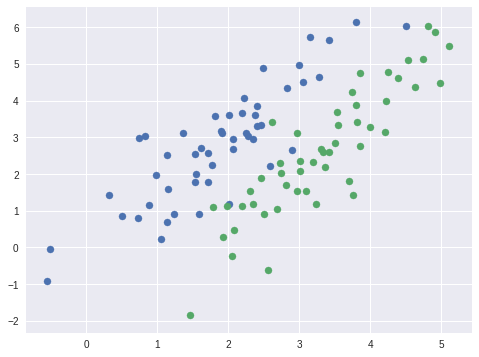

In [0]:
# Classifieur 
svc = svm.SVC(kernel='linear', max_iter=-1)

# Premier jeu de données
trainX, trainY, testX, testY=td.generate_data(0)
  
td.show_data_2D(trainX,trainY)
plt.show()



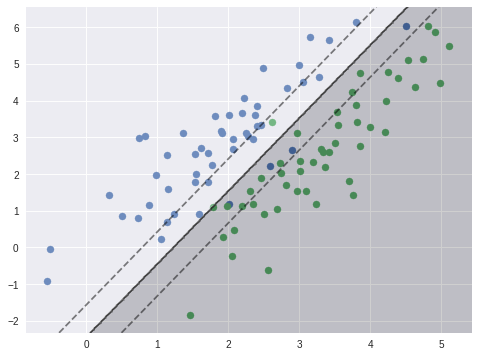

Erreur d'apprentissage = 95.00%
Erreur de test = 95.00%
Erreur de test (par predict) = 95.00%


In [0]:
# METTRE VOTRE CODE ICI
svc.fit(trainX, trainY)

td.show_data_2D(trainX,trainY)
td.plot_svc_decision_function(svc)
plt.show()

score_train = svc.score(trainX, trainY)
print("Erreur d'apprentissage = {:.2f}%".format(score_train*100))

score_test = svc.score(testX, testY)
print("Erreur de test = {:.2f}%".format(score_test*100))

predY = svc.predict(testX)
nequal = (predY == testY).sum()
print("Erreur de test (par predict) = {:.2f}%".format(nequal/testY.shape[0]*100))


<div class="alert alert-block alert-info">
Recommencer la séquence d'apprentissage avec les autres distributions de données (1 à 3).
</div>

Gaussian two class heterogeneous variance samples


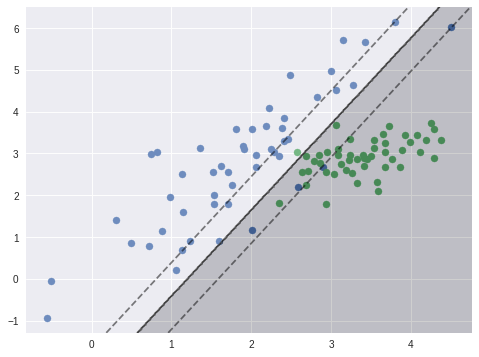

Score d'apprentissage = 95.00%
Score de test = 92.50%
Intricated data


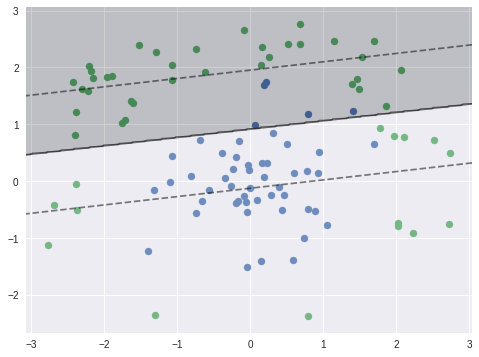

Score d'apprentissage = 80.00%
Score de test = 81.00%
XOR like distribution


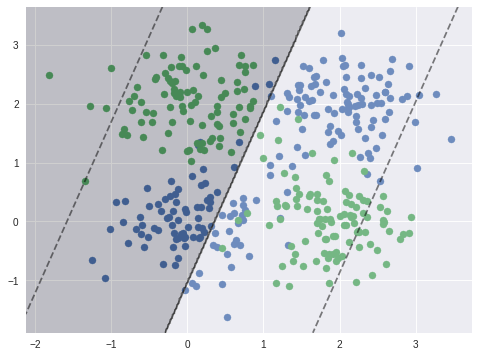

Score d'apprentissage = 56.00%
Score de test = 55.25%


In [0]:
# METTRE VOTRE CODE ICI
for itest in [1,2,3]:
    trainX, trainY, testX, testY=td.generate_data(itest)

    svc.fit(trainX, trainY)

    td.show_data_2D(trainX,trainY)
    td.plot_svc_decision_function(svc)
    plt.show()

    score_train = svc.score(trainX, trainY)
    print("Score d'apprentissage = {:.2f}%".format(score_train*100))

    score_test = svc.score(testX, testY)
    print("Score de test = {:.2f}%".format(score_test*100))


<div class="alert alert-block alert-success">
QUESTION: Expliquez les différences de comportement du classifieur.
</div>

**Réponse**

Certaines distributions de données ne sont pas linéairement séparables (données 2 et 3). Le noyau linéaire des SVM n'est alors pas adapté. La distribution 3 produit une erreur proche du taux maximal pour la discrimination de 2 classes (50%). 

### Activité 1.2: Influence du noyau

<div class="alert alert-block alert-info">
Repérer comment spécifier le type de noyau utilisé, et ses paramètres.

Reprendre l'étude précédente en jouant sur le type de noyau et sur ses paramètres. 

Illustrer les différences en utilisant la fonction de visualisation `td.plot_svc_decision_function`.
</div>

In [0]:
# METTRE VOTRE CODE ICI

for itest in [1,2,3]:
    trainX, trainY, testX, testY=td.generate_data(itest)

    for kernel in ['rbf', 'poly', 'sigmoid']:
        svc = svm.SVC(kernel=kernel, max_iter=-1, gamma='auto')

        svc.fit(trainX, trainY)

        td.show_data_2D(trainX,trainY)
        td.plot_svc_decision_function(svc)
        plt.title("Kernel = {}".format(kernel))
        plt.show()

        score_train = svc.score(trainX, trainY)
        print("Score d'apprentissage = {:.2f}%".format(score_train*100))

        score_test = svc.score(testX, testY)
        print("Score de test = {:.2f}%".format(score_test*100))


<div class="alert alert-block alert-success">
QUESTION: Commentez les différences de comportement du classifieur.
</div>

**Réponse**

Certains noyaux permettent d'obtenir une meilleure discrimination que d'autres, avec le paramétrage par défaut. Le noyau 'RBF' semble le plus polyvalent sur les distributions étudiées. Le noyau 'sigmoid' le moins stable.

### Activité 1.3 : Influence des paramètres de régularisation

<div class="alert alert-block alert-info">
Nous étudions ici comment l'algorithme SVM est capable de gérer la présence de données aberrantes ("outliers" en anglais) en jouant sur ses paramètres de généralisation.

On génère différents niveaux de bruit en spécifiant le paramètre `noise` (entre 0 et 1) dans la fonction de génération de données:
</div>

>```python td.generate_data(family_number, noise=0.1) ```

<div class="alert alert-block alert-info">
Repérer le paramètre à spécifier pour fixer le paramètre de régularisation.

Etudier l'influence de ce paramètre sur le jeu de données 2 avec un noyau "rbf" en produisant différents résultats de classification (visualisation et erreur sur ensemble de test), et différentes valeurs de bruit. 

</div>

In [0]:
trainX, trainY, testX, testY=td.generate_data(2, noise=0.1)

# METTRE VOTRE CODE ICI

Clist=[0.01,0.1,1,10,100]

for Cval in Clist:
    svc = svm.SVC(C=Cval, gamma = 1.0, kernel='rbf', max_iter=-1)
    svc.fit(trainX, trainY)
    score=svc.score(testX, testY)
    
    td.show_data_2D(testX,testY)
    td.plot_svc_decision_function(svc, plot_support=False)
    plt.title("C = {}".format(Cval))
    plt.show()
    
    score_test = svc.score(testX, testY)
    print("Score de test = {:.2f}%".format(score_test*100))



In [0]:
fig, ax = plt.subplots()
for noiseVal in [0,0.1,0.2,0.3]:
    
    trainX, trainY, testX, testY=td.generate_data(2, noise=noiseVal)

    Clist=np.logspace(-2,1,20)

    score=[]
    scorelearn=[]
    for Cval in Clist:
        svc = svm.SVC(C=Cval, gamma = 1.0, kernel='rbf', max_iter=-1)
        svc.fit(trainX, trainY)
        score.append(svc.score(testX, testY))
        scorelearn.append(svc.score(trainX, trainY))

        #ax.semilogx(Clist,score,label='noise = {}'.format(noiseVal))
        #ax.semilogx(Clist,scorelearn,label='noise learn = {}'.format(noiseVal))

    ax.semilogx(Clist,np.array(scorelearn) - np.array(score),label='noise learn = {}'.format(noiseVal))

    plt.title('Différence entre apprentissage et test pour différentes valeurs de bruit')
    plt.legend()
plt.show()


<div class="alert alert-block alert-success">
QUESTION: Commentez les différences de comportement du classifieur.
</div>

**Réponse**

Les différentes valeurs du coefficient C de régularisation génèrent différents niveaux d'erreur. Plus 'C' est faible, plus le classifieur est "lisse", régulier. 

La régularisation a pour objectif de minimiser l'erreur entre erreur d'apprentissage et erreur de test. Sur cet exemple, le bruit n'est produit que pour les données d'apprentissage (pas les données de test). L'erreur de test est alors inférieure à celle d'apprentissage dans la configuration optimale.

Une valeur optimale est à rechercher pour C entre 0.2 et 1 pour ce jeu de données.



### Activité 1.4: Optimisation des paramètres par validation croisée

<div class="alert alert-block alert-info">

On cherche les meilleurs paramètres adaptés aux données, sans utiliser les données de test. On se propose ici d'utiliser une méthode systématique de recherche par validation croisée.

<br>
L'environnement scikit-learn permet d'automatiser cette recherche en utilisant la classe [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).

<br>
Le principe d'utilisation de cette classe est d'estimer l'erreur de généralisation par validation croisée sur une grille de paramètres. Cette grille est définie comme un `dict` (ou une `list` de `dict`) où chaque clé contient une liste de paramètres. L'appel à la méthode `fit` sur le classifieur estime les performances sur l'ensemble des configurations possibles:
</div>

>```python clf = GridSearchCV(svc, parameter_dict) ```

>```python clf.fit(trainX, trainY) ```

<div class="alert alert-block alert-info">

Utiliser cette classe pour trouver la meilleure combinaison de paramètres (noyau, paramètres du noyau, coefficient de régularisation) pour les jeux de données 2 et 3.

</div>

In [0]:
# Import de la classe pour Validation Croisée
from sklearn.model_selection import GridSearchCV

svc = svm.SVC(shrinking=True,max_iter=1000000,gamma='auto') # max_iter = 1000000 pour limiter les non convergences de l'optimiseur 

for itest in [1,2,3]:
    trainX, trainY, testX, testY=td.generate_data(itest)

    # METTRE VOTRE CODE ICI

    parameters = [{'kernel':['rbf'], 
                  'C':np.logspace(-2, 2, 7), 
                  'gamma':np.logspace(-3, 2, 10)},
                 {'kernel':['poly'], 
                  'C':np.logspace(-2, 2, 7), 
                  'degree':[2,3,4]}]


    clf = GridSearchCV(svc, parameters)
    clf.fit(trainX, trainY)

    bestsvc = clf.best_estimator_

    print("Best score = {:.2f} with kernel {}".format(clf.best_score_, bestsvc.kernel))
    if bestsvc.kernel == 'rbf':
        print("Parameters are gamma = {:.2g} and C = {:2g}".format(bestsvc.gamma, bestsvc.C))
    elif bestsvc.kernel == 'poly':
        print("Parameters are degree = {} and C = {:2g}".format(bestsvc.degree, bestsvc.C))


    td.show_data_2D(testX,testY)
    td.plot_svc_decision_function(bestsvc, plot_support=False)
    plt.show()


<div class="alert alert-block alert-success">
QUESTION: Quelles configurations de paramètres optimales obtenez-vous?
</div>

**Réponse**


## Partie 2 : multi-classe avec SVM

Dans cette partie, l'objectif est de discriminer les données en plusieurs classes. Comme indiqué dans le cours, deux stratégies principales sont couramment utilisées: un contre un ("one vs. one") ou un contre les autres ("one vs. rest"). L'environnement scikit-learn contient une sur-classe [`multiclass`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass) capable de gérer ces deux types de stratégies.


Dans le cas des problèmes multi-classe, les performances sont usuellement évaluées sous la forme de [matrices de confusion](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).


### Activité 2.1: stratégies de classification multi-classe

<div class="alert alert-block alert-info">

Comparez les deux stratégies multi-classe `OneVsOne` et `OneVsRest` sur les données du jeu de test 4 et un noyau polynomial. Utilisez pour cela la sur-classe `multiclass`, et fournir les matrices de confusion de la classification.

</div>

In [0]:
# Utilisation des deux stratégies multi-classe ("one vs. one", "one vs. rest")
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# Pour calculer une matrice de confusion
from sklearn.metrics import confusion_matrix

trainX, trainY, testX, testY=td.generate_data(4)


svc = svm.SVC(C=0.1, kernel='poly', degree=2, max_iter=10000, gamma='auto')


In [0]:
# METTRE VOTRE CODE ICI

svcmulti = OneVsRestClassifier(svc)
svcmulti.fit(trainX, trainY)
td.show_data_2D(trainX,trainY)
td.plot_svc_decision_regions(svcmulti)
plt.title('OneVsRest')
plt.show()

predY = svcmulti.predict(testX)
print(confusion_matrix(testY, predY))

print("OneVsRest score = {}".format(svcmulti.score(testX, testY)))

svcmulti = OneVsOneClassifier(svc)
svcmulti.fit(trainX, trainY)
td.show_data_2D(trainX,trainY)
td.plot_svc_decision_regions(svcmulti)
plt.title('OneVsOne')
plt.show()

predY = svcmulti.predict(testX)
print(confusion_matrix(testY, predY))

print("OneVsOne score = {}".format(svcmulti.score(testX, testY)))


<div class="alert alert-block alert-success">
QUESTION: Commentez les différences de comportement du classifieur.
</div>

**Réponse**

La répartition des données diffère selon les classes. Certaines classes ont deux modes, intriqués avec les autres distributions. Dans ce cas de figure, la stratégie "un contre un" semble la plus efficace (légèrement) car elle permet de mieux spécialiser les classifieurs à chaque type de difficulté.

### Activité 2.2: classification de chiffres manuscrits


<div class="alert alert-block alert-info">

On dispose d’un ensemble d’images de données de chiffres manuscrits. L’objectif de cette partie est de se mettre dans les conditions d’une compétition de reconnaissance des formes pour produire les meilleures performances sur l’ensemble de test pour lequel on ne connaît pas la vraie classe (« vérité terrain » = ground truth en anglais). Dans le cadre de ce TD, et pour situer le niveau de performances, on évaluera les classifieurs sur la base de test, mais elle ne devra pas être utilisée pour l'apprentissage.

<br><br>
Définissez une stratégie de recherche de paramètres par validation croisée sur les noyaux et leurs paramètres. Rem: on peut obtenir plus de 95% de reconnaissance sur la base de test. Visualisez quelques exemples de données mal classées.

</div>

In [0]:
#Chargement des données
from sklearn import datasets

images, classes = datasets.load_digits(return_X_y = True)
n_samples = len(images)
data = images.reshape((n_samples, -1))

#Constitution des bases d'apprentissage et de test
ntrain = 800
trainX = data[:ntrain,:]
trainY = classes[:ntrain]
testX = data[ntrain:-1,:]
testY = classes[ntrain:-1]

#Visu des données
fig, axes = plt.subplots(2, 4)

for ax in axes.flat:
    isample = np.random.randint(trainX.shape[0])
    ax.imshow(trainX[isample].reshape(8,8),cmap='gray')
    ax.set_title("Chiffre = {}".format(trainY[isample]))
    ax.axis('off')

plt.show() 

In [0]:
# METTRE VOTRE CODE ICI

parameters = [{'kernel':['linear'], 
              'C':np.logspace(-2, 2, 5)},
              {'kernel':['rbf'], 
              'C':np.logspace(-2, 2, 5), 
              'gamma':np.logspace(-3, 2, 10)},
             {'kernel':['poly'], 
              'C':np.logspace(-2, 2, 5), 
              'degree':[2,3,4]}]

svc = svm.SVC(shrinking=False,max_iter=10000, verbose=1)
clf = GridSearchCV(cv=5,estimator=svc, param_grid=parameters)
clf.fit(trainX, trainY)

bestsvc = clf.best_estimator_

print("\nBest score = {:.2f}% with kernel {}".format(100*clf.best_score_, bestsvc.kernel))
if bestsvc.kernel == 'rbf':
    print("Parameters are gamma = {:.2g} and C = {:2g}".format(bestsvc.gamma, bestsvc.C))
elif bestsvc.kernel == 'poly':
    print("Parameters are degree = {} and C = {:2g}".format(bestsvc.degree, bestsvc.C))

predY=bestsvc.predict(testX)
print(confusion_matrix(testY, predY))

nequal = (predY == testY).sum()
print("Taux de reco = {:.2f}%".format(nequal/testY.shape[0]*100))


In [0]:
# Visualisation des données mal classées

# METTRE VOTRE CODE ICI

ibad=(predY != testY).nonzero()[0]

fig, axes = plt.subplots(2, 4)
for ax in axes.flat:
    isample = ibad[np.random.randint(ibad.shape[0])]
    ax.imshow(testX[isample].reshape(8,8),cmap='gray')
    ax.set_title("Predit {} au lieu de {}".format(predY[isample], testY[isample]))
    ax.axis('off')

plt.show() 


In [0]:
# Autre version avec LinearSVC (beaucoup plus rapide)

parameters = {'C':np.logspace(-3, 3, 7)}
svc = svm.LinearSVC(max_iter=10000, tol=1e-3, verbose=True, dual=False)

clf = GridSearchCV(cv=5,estimator=svc, param_grid=parameters)
clf.fit(trainX, trainY)

bestsvc = clf.best_estimator_

print("\nBest score = {:.2f}% with C={:.2g}".format(100*clf.best_score_, bestsvc.C))

predY=bestsvc.predict(testX)
print(confusion_matrix(testY, predY))

nequal = (predY == testY).sum()
print("Taux de reco = {:.2f}%".format(nequal/testY.shape[0]*100))


Pour aller plus loin, d'autres bases d'apprentissage de chiffres manuscrits, et les scores de différentes approches, sont accessibles [ici](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#5356484e). 

La base MNIST peut être chargée par le script ci-dessous. Elle contient également une base de caractéristiques calculées sur les images source (HOG = Histogram Of Gradients, descripteurs de Fourier).


# Mettre la CELL en type `code` pour l'exécuter 
# Chargement des données MNIST
import scipy.io

# Images brutes et annotations
mat = scipy.io.loadmat('data/mnist_test_train.mat')
testImg = mat['testImg']
trainImg = mat['trainImg']
testY = mat['testY'].ravel()
trainY = mat['trainY'].ravel()

# caractéristiques image de type HOG (histogram of gradients)
mat = scipy.io.loadmat('data/hog_test_train.mat')
testF = mat['testF']
trainF = mat['trainF']

# Visu d'exemples
fig, axes = plt.subplots(2, 4)

for ax in axes.flat:
    ax.imshow(testImg[np.random.randint(testImg.shape[0])].reshape(28,28),cmap='gray')
    ax.axis('off')
plt.show()
